In [3]:
import numpy as np

In [1]:
import holoviews as hv
import datashader as ds
from holoviews.operation.datashader import shade, datashade, dynspread
from holoviews.operation import decimate

/home/schowell/data/myPrograms/anaconda3/envs/hvtutorial/lib/python3.6/site-packages/odo/backends/pandas.py:102: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access NaTType as type(pandas.NaT)
  @convert.register((pd.Timestamp, pd.Timedelta), (pd.tslib.NaTType, type(None)))



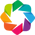

In [2]:
hv.notebook_extension('bokeh')

In [9]:
import bokeh.plotting

In [11]:
bokeh.plotting.output_notebook()

Loading BokehJS ...

In [48]:
n_dist = 5
n_points = 10000
mu = np.random.randint(-40, 40, 2 * n_dist)
sigma = np.random.randint(1, 25, 2 * n_dist)

points = np.empty((n_dist*n_points, 2))
for i in range(n_dist):
    x = np.random.normal(loc=mu[i], scale=sigma[i], size=n_points)
    y = np.random.normal(loc=mu[i+n_dist], scale=sigma[i+n_dist], size=n_points)
    i_first = i * n_points
    i_last = (i + 1) * n_points
    points[i_first:i_last, :] = np.c_[x, y]

In [49]:
p = bokeh.plotting.figure()
p.circle(points[:, 0], points[:, 1])
bokeh.plotting.show(p)

In [50]:
hv_points = hv.Points(points, label='Points')
hv_points

:Points   [x,y]

In [57]:
datashade(hv_points)

:DynamicMap   []

In [55]:
datashade(hv_points) + dynspread(datashade(hv_points))

:Layout
   .DynamicMap.I  :DynamicMap   []
   .DynamicMap.II :DynamicMap   []

In [56]:
# Set plot and style options
hv.util.opts('Image [width=600 height=600 shared_axes=True logz=True] {+axiswise} ')
hv.util.opts("HLine VLine (color='gray' line_width=1) Layout [shared_axes=True] ")
hv.util.opts("Curve [xaxis=None yaxis=None show_grid=False, show_frame=False] (color='orangered') {+framewise}")

In [37]:
n_dist = 4
n_points = 10000
mu = np.random.randint(-40, 40, 2 * n_dist)
sigma = np.random.randint(1, 25, 2 * n_dist)

points = np.empty((n_dist*n_points, 2))
for i in range(n_dist):
    x = np.random.normal(loc=mu[i], scale=sigma[i], size=n_points)
    y = np.random.normal(loc=mu[i+n_dist], scale=sigma[i+n_dist], size=n_points)
    i_first = i * n_points
    i_last = (i + 1) * n_points
    points[i_first:i_last, :] = np.c_[x, y]

In [ ]:
# Use datashader to rasterize and linked streams for interactivity
agg = aggregate(projected, link_inputs=True, x_sampling=0.0001, y_sampling=0.0001)
pointerx = hv.streams.PointerX(x=-74, source=projected)
pointery = hv.streams.PointerY(y=40.8,  source=projected)
vline = hv.DynamicMap(lambda x: hv.VLine(x), streams=[pointerx])
hline = hv.DynamicMap(lambda y: hv.HLine(y), streams=[pointery])

sampled = hv.util.Dynamic(agg, operation=lambda obj, x: obj.sample(lon=x),
                          streams=[pointerx], link_inputs=False)

hvobj = ((agg * hline * vline) << sampled.opts(plot={'Curve': dict(width=100)}))

# To Do:
- log, eq_hist, linear
- specify cmap
- change figure size
- label axes
- legend (update interactively?)